In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Final Project
by Jace Hollenbach

### Abstract

In this project I work with and analyze NFL combine data. I first try linear regression models to predict draft place. After this is unsuccessful, I switch to a classification model based on round drafted. After finding that a decision tree model is most effective at predicting draft round, I create decision tree models based on player position. These models are most effective out of any of the tested models.

## Introduction

The dataset being worked on in this project is NFL draft combine data from 2000-2018.
This dataset is important because drafting the right players is essential to the success of a football
team. The goal of this project was originally to create a regression model to predict draft place based on the
players’ combine data. This could become a useful aid for teams to know when they should draft
players that they want. A regression model came with many different challenges that made it quite difficult to successfully draft. Instead I turned towards a classification model that attempted to pick what round a player would be drafted in, or if they would go undrafted. A classification model would still be good at predicting roughly where a player would be drafted, and would still give a good idea for scouts and media how the draft will go.

## Data Collection and Preparation

This dataset comes with many features. This includes player name, position, height, weight, and quantitative data on the tests that the athletes do these tests are, the 40 yard dash, vertical jump, bench press reps at 225 pounds, broad jump, three cone drill, and shuttle drill. Then the dataset says what place the player was drafted. The problem that comes with this dataset is that a lot of players decide not to do certain tests, and a lot of players are not drafted. This makes it not possible to use those players. Since bench press is often opted out of. I decided to remove it from the dataset, because the sample size would shrink significantly if I removed all players that opted out of the bench press. Aside from bench press, if any player did not complete all of the other tests they were removed from the dataset.

## Model Explanation

The original goal was to create a linear regression model that would predict the position that a player would be drafted. This model was very inaccurate. This was likely caused by the fact that there are many other factors that go into what team drafts what player other than their combine data. Instead I pivoted towards a more general model. There are several different classification models that are created in this project. All of the created models rely on the features, height, weight, forty yard dash, vertical, broad jump, cone drill, and shuttle drill, in order to  There is a decision tree model built to predict one of 8 categories independent of player position. The 8 categories are 1st round, 2nd round, 3rd round, 4th round, 5th round, 6th round, 7th round, and undrafted. There is also a Naive Bayes model useding the same features to predict the same 8 categories. After this there are position specific decision tree models for wide receiver, cornerback, and runningback. The reason for the position specific models is that different positions in football have very different body types than other postitions. So if we compare runningbacks to runningbacks we can get a better idea of what NFL general managers are looking for. The reason the model is only done for these positions is because there are many positions in football, and these are the ones with the most players in the combine. Thus making it the easiest to create a reliable model. 2480 

## Model Results and Validation

The first attempted model was a linear regression model, although it is shown to be ineffective. After section there are five different classification models created. A general decision tree model, a general naive bayes model, and aposition specific decision tree model for wide receivers, cornerbacks, and runningbacks.

In the attempted linear regression model I first removed all undrafted players from the dataset, as it was difficult to find a reasonable number to give for them. I then built a linear regression model using the previously mentioned features, and the previously mentioned labels.

In [2]:
#reading in the data
df = pd.read_csv("combinedata.csv")

In [3]:
dfNoNan = df.dropna(how = 'any')

In [4]:
from sklearn.linear_model import LinearRegression
target_df = dfNoNan['Pick']

In [5]:
X = dfNoNan[['Ht', 'Wt', 'Forty', 'Vertical', 'BenchReps', 'BroadJump', 'Cone', 'Shuttle']]
modelLR = LinearRegression()
modelLR.fit(X, target_df)

LinearRegression()

In [6]:
values = modelLR.predict(X)

We now look the average residual, accuracy score, and a scatterplot of the predictions compared to the actual pick numbers.

In [7]:
resids = target_df - values
(resids.abs()).mean()

54.908604076462055

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(modelLR, X, target_df, cv = 4,scoring = 'r2').mean()

0.0775966035075959

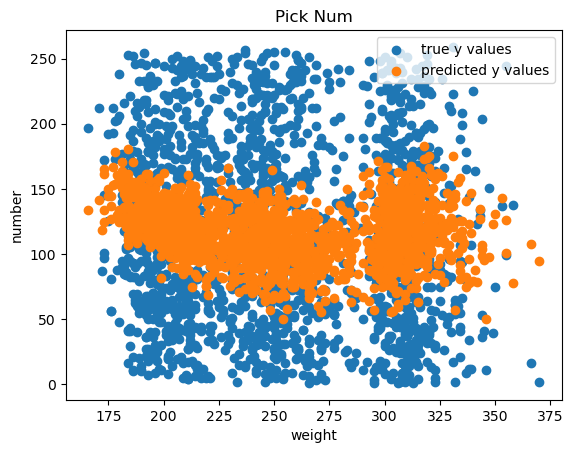

In [9]:
plt.scatter(dfNoNan['Wt'],target_df, label = 'true y values') 
plt.scatter(dfNoNan['Wt'],values, label = 'predicted y values')
plt.title("Pick Num")
plt.xlabel("weight")
plt.ylabel("number")
plt.legend()
plt.show()

There is an average residual of 54.9 and an r^2 value of 0.076. Which means that 7.6% of the variation of draft pick is accounted for by the linear relationship between the draft pick and the selected features. Basically there is not a very strong linear relationship between the selected features and the draft pick.

Other linear models were tested and were also quite ineffective.  As a result of this we pivot towards classification models. The first model we create is a decision tree model using all players who have full data. We must replace the round for those who are undrafted with the word undrafted, in order to create our first model. Then we use the sklearn methods in order to fit the model to the selected features and labels.

In [10]:
df['Round'].fillna('undrafted', inplace = True)
df['Team'].fillna('no team', inplace = True)
df['Round'] = df['Round'].astype(str)
df['Pick'].fillna(257, inplace = True)
dfNoNanWithUndrafted = df.dropna(how = 'any')
dfNoNanWithUndrafted

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
7,Corey Atkins,OLB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,2000,AtkiCo20,1.0,no team,undrafted,257.0
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,AustRe20,3.0,Chicago Bears,4.0,125.0
12,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,BarnRa20,1.0,Cleveland Browns,7.0,225.0
13,David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,2000,BarrDa22,10.0,Arizona Cardinals,4.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,Toby Weathersby,OT,76,317,5.34,24.5,28.0,106.0,8.55,5.38,2018,WeatTo00,0.0,no team,undrafted,257.0
6196,Sean Welsh,C,75,306,5.43,25.0,20.0,103.0,7.90,4.81,2018,WelsSe00,0.0,no team,undrafted,257.0
6204,Connor Williams,OT,77,296,5.05,34.0,26.0,112.0,7.83,4.63,2018,WillCo00,0.0,no team,undrafted,257.0
6206,Cedrick Wilson-02,WR,74,197,4.55,37.0,9.0,121.0,6.89,4.23,2018,WilsCe01,0.0,no team,undrafted,257.0


In [11]:
X = dfNoNanWithUndrafted[['Ht', 'Wt', 'Forty', 'Vertical', 'BenchReps', 'BroadJump', 'Cone', 'Shuttle']]
label = dfNoNanWithUndrafted['Round']

In [12]:
from sklearn.tree import DecisionTreeClassifier 
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
modelDT.fit(X, label)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [13]:
y_predDT =  modelDT.predict(X)

After fitting the model, and attempting to predict the round that a player is drafted, we now check the accuracy of our model. We check this visually with heatmap, and we also look at the accuracy score, and the cross validation score. The heatmap shows on the y-axis what round the model predicts the player will be drafted in, and on the x-axis the actual round the player was drafted in.

Text(113.9222222222222, 0.5, 'predicted label')

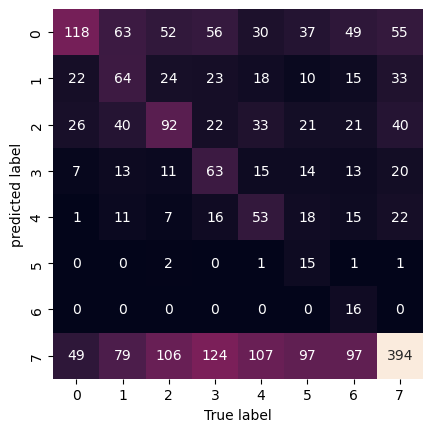

In [14]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(label,y_predDT)

sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label')

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(label, y_predDT)

0.34651360544217685

In [16]:
from sklearn.model_selection import cross_val_score 
cross_val_score(modelDT,X,label, cv = 10).mean()

0.21260728452939054

We now follow the same order as before to build and test our Naive Bayes' model.

In [17]:
from sklearn.naive_bayes import GaussianNB
modelG  = GaussianNB()
modelG.fit(X,label)

GaussianNB()

In [18]:
y_predG = modelG.predict(X)

Text(113.9222222222222, 0.5, 'predicted label')

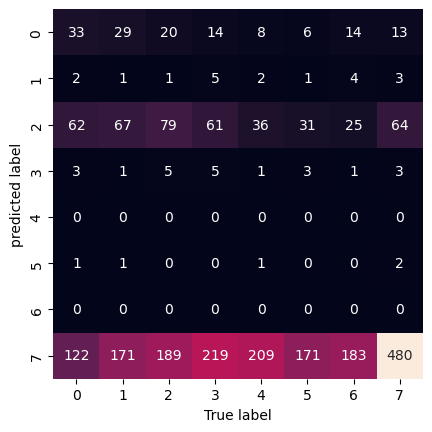

In [19]:
conf_mat = confusion_matrix(label,y_predG)

sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label')

In [20]:
accuracy_score(label, y_predG)

0.2542517006802721

In [21]:
cross_val_score(modelG,X,label, cv = 10).mean()

0.24276415434547421

The decision tree model had an accuracy score of 0.346 while the Naive Bayes' had an accuracy of 0.254. As far as cross validation goes the decision tree had 0.213 and the Naive Bayes' had a score of 0.243. Based on this conclusion we will build our position specific models using the decision tree classifier. We can see on both models there is a heavy lean towards players being predicted to be undrafted. This is because 2048 of the 6812 players in this dataset are undrafted.

In order to build our position specific models we will first row mask for the position, then drop any of the players, that have not done all of tests were are using from the dataframe. After this we will follow a similar process to the original decision  tree in order to test and validate the model. For these models a max depth of 4 is chosen, because when higher numbers of depth were used the cross validation score was too low, so I used a max depth of 4 to insure I wasn't overfitting the model.

In [22]:
wideRecMask =  df['Pos'] == 'WR'

df_wr3 = df[wideRecMask]
df_wr3 = df_wr3.drop(columns = ['Player', 'BenchReps', 'Year', 'Pfr_ID', 'AV', 'Team'])
df_wr3 = df_wr3.dropna(how = 'any')

In [23]:
X = df_wr3[['Ht', 'Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle']]
label = df_wr3['Round']

In [24]:
from sklearn.tree import DecisionTreeClassifier 
modelDTWR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
modelDTWR.fit(X, label)
y_predDTWR =  modelDTWR.predict(X)


Text(113.9222222222222, 0.5, 'predicted label')

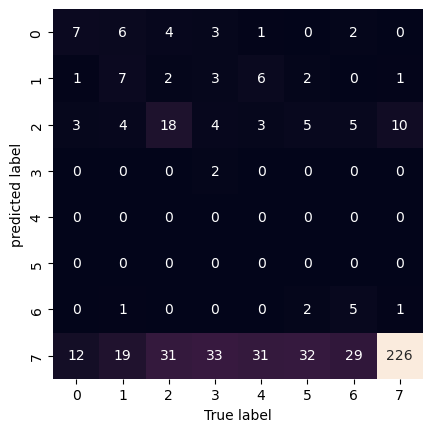

In [25]:
conf_mat = confusion_matrix(label,y_predDTWR)

sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label')

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(label, y_predDTWR)

0.508637236084453

In [27]:
from sklearn.model_selection import cross_val_score 
cross_val_score(modelDTWR,X,label, cv = 5).mean()

0.4222710622710622

The same process is repeated for the next two position models.

In [28]:
cbMask =  df['Pos'] == 'CB'

df_cb = df[cbMask]
df_cb = df_cb.drop(columns = ['Player', 'BenchReps', 'Year', 'Pfr_ID', 'AV', 'Team'])
df_cb = df_cb.dropna(how = 'any')

In [29]:
X = df_cb[['Ht', 'Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle']]
label = df_cb['Round']

In [30]:
modelDTCB = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
modelDTCB.fit(X,label)
y_predDTCB =  modelDTCB.predict(X)


Text(113.9222222222222, 0.5, 'predicted label')

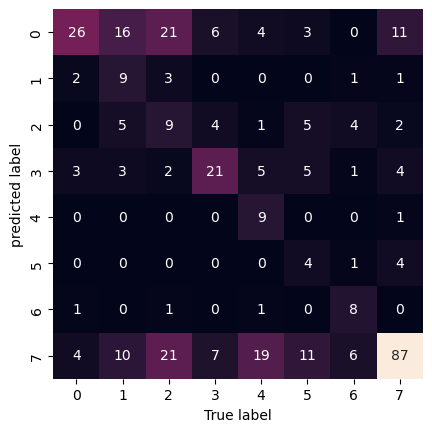

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(label,y_predDTCB)

sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label')

In [32]:
accuracy_score(label, y_predDTCB)

0.4650537634408602

In [33]:
cross_val_score(modelDTCB,X,label, cv = 5).mean()

0.23654054054054058

In [34]:
rbMask = df['Pos'] == 'RB'

df_rb = df[rbMask]
df_rb = df_rb.drop(columns = ['Player', 'BenchReps', 'Year', 'Pfr_ID', 'AV', 'Team'])
df_rb = df_rb.dropna(how = 'any')

In [35]:
X = df_rb[['Ht', 'Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle']]
label = df_rb['Round']

In [36]:
modelDTRB = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
modelDTRB.fit(X,label)
y_predDTRB =  modelDTRB.predict(X)

Text(113.9222222222222, 0.5, 'predicted label')

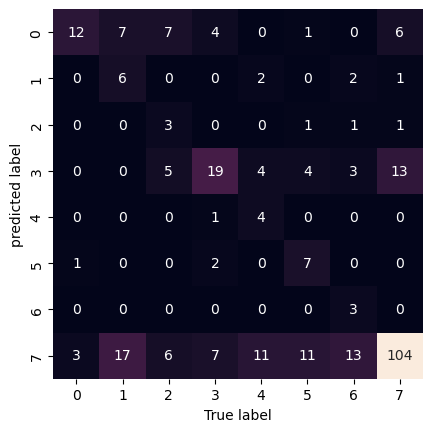

In [37]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(label,y_predDTRB)

sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label')

In [38]:
accuracy_score(label, y_predDTRB)

0.541095890410959

In [39]:
cross_val_score(modelDTRB,X,label, cv = 5).mean()

0.30794856808883697

We see that the accuracy scores and cross validation scores increased significantly in the position specific models. The WR, CB, and RB came with accuracy scores of 0.509, 0.465, and 0.541. The cross validation scores were 0.422, 0.267, and 0.308. All of these numbers a larger than the accuracy scores and cross validation scores from the general models. This is as we expected, because many nfl positions have different body types, thus causing the models were athletes are only compared to other athletes of the same position to be more effective.

## Conclusion

The original goal of this project was to predict the draft place of a player based on their NFL Combine data. This regression model proved too difficult, so instead I switched to a classification model. I tried multiple different models, until I found that decision tree model by position is the best way to predict what round a player will be drafted in. When the next NFL draft comes around it would be very interesting to test this model on players in the draft, and see how accurate the classification model is.

## Reflection

This project was certainly a learning experience for me as my original plan of linear regression did not work. I could definetly see that each modification I made to my model, the model seemed to improve. The by position decision tree models are certainly better than the original general models. I think if I were to spend more time tweaking the models I could make them more accurate. The results were definitely different than I expected, because I thought the linear regression model, and the decision tree classification would be more accurate. Another challenge that came with this project was what to do with NaN values. Eventually I decided that the best thing to do would be to remove bench press from the features list, since it removed so many players. Then remove any of the athletes who passed on any of the other tests. I think I would try two new things if I were to expand on this research. I would try to add the players college stats to the dataframe, and try to add them to the features used to predict the players draft position. I would also try to add as much combine data as I can from 1982 to 2000, so that I would have enough data to build models for some of the less common positions.